In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

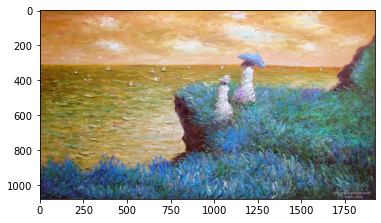

In [2]:
img = cv2.imread('./211635.jpg')
plt.imshow(img)

In [3]:
#複数色チャンネルの分割
img_bgr = cv2.split(img)
#B-R, G-B, R-G
img_dst = cv2.merge((img_bgr[2], img_bgr[0], img_bgr[1]))

In [4]:
#RGB-HSV(色空間はそれぞれモデルが異なる)
img_dst = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [ ]:
#ヒストグラム, 256x100pc, 0で初期化
img_hst = np.zeros([100, 256]).astype('uint8')
rows, cols = img_hst.shape[:2]

#度数分布を求める
hdims = [256]
hranges = [0, 256]
hist = cv2.calcHist([img], [0], None, hdims, hranges)

#度数の最大値を取得
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(hist)

for i in range(0, 255):
    v = hist[i]
    cv2.line(img_hst, (i, rows), (i, rows-rows * (v/ max_val)), (255, 255, 255))

In [ ]:
#ヒストグラム均一化
img_dst  = cv2.equalizeHist(img)

In [13]:
#ガンマ変換,ルックアップテーブル生成
gamma = 2.0
Y = np.ones((256, 1), dtype = 'uint8') * 0
for i in range(256):
    Y[i][0] = 255 * pow(float(i) / 255, 1.0 / gamma)
#ルックアップテーブル変換
img_dst = cv2.LUT(img, Y)

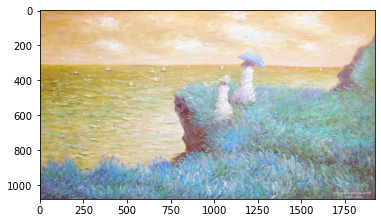

In [14]:
plt.imshow(img_dst)

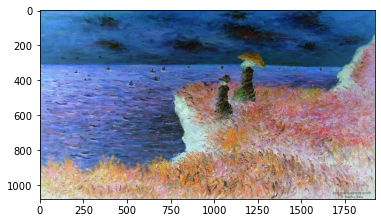

In [15]:
#ネガポジ変換
img_dst = 255 - img
plt.imshow(img_dst)

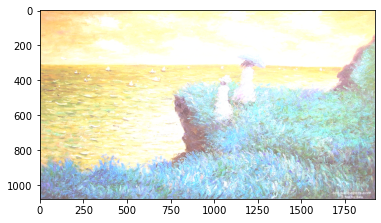

In [6]:
#明度調整
shift = 100
table = np.arange(256, dtype = np.uint8)
for i in range(0, 255):
    j = i + shift
    if j < 0:
        table[i] = 0
    elif j > 255:
        table[i] = 255
    else:
        table[i] = j
        
img_dst = cv2.LUT(img, table)
plt.imshow(img_dst)

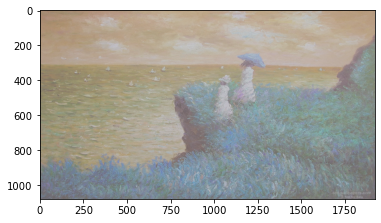

In [8]:
#コントラスト低減
min = 100
max = 200
img_norm = cv2.normalize(img, img_dst, min, max, cv2.NORM_MINMAX)
plt.imshow(img_norm)

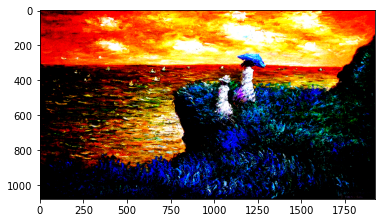

In [9]:
#コントラスト強調
min = 150
max = 200
table = np.arange(256, dtype=np.uint8)
for i in range(0, min):
    table[i] = 0
for i in range(min, max):
    table[i] = 255 * (i - min) / (max - min)
for i in range(max, 255):
    table[i] = 255
    
img_dst = cv2.LUT(img, table)
plt.imshow(img_dst)

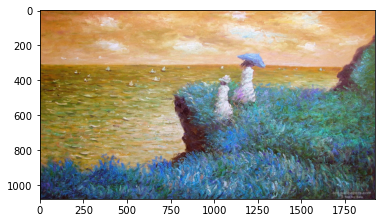

In [13]:
#ガウシアン,バイラテラルフィルター
img_dst = cv2.GaussianBlur(img, (5, 5), 1)
plt.imshow(img_dst)

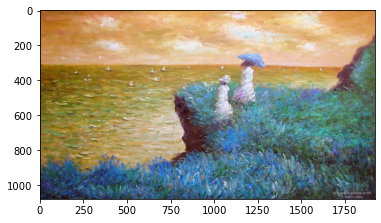

In [15]:
img_dst = cv2.bilateralFilter(img, 11, 50, 100)
plt.imshow(img_dst)

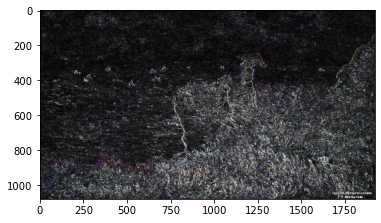

In [3]:
#Sobel filter
img_tmp = cv2.Sobel(img, cv2.CV_32F, 1, 0)
img_dst = cv2.convertScaleAbs(img_tmp)
plt.imshow(img_dst)

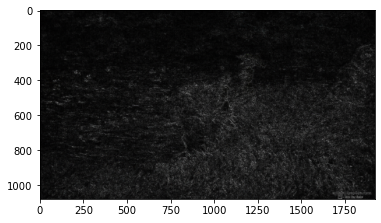

In [8]:
#Laplacian filter
img_tmp = cv2.Laplacian(img, cv2.CV_32F, 3)
img_dst = cv2.convertScaleAbs(img_tmp)
plt.imshow(img_dst)

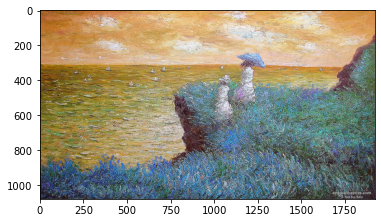

In [3]:
#鮮鋭化フィルター
k = 1
op = np.array([[-k, -k,        -k],
               [-k, 1 + 8 * k, -k],
               [-k, -k,        -k]])

img_tmp = cv2.filter2D(img, -1, op)
img_dst = cv2.convertScaleAbs(img_tmp)
plt.imshow(img_dst)

In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

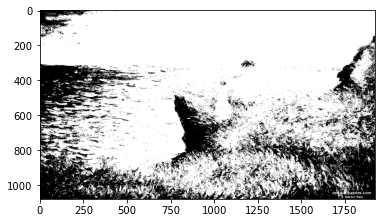

In [24]:
#二値化処理
thresh = 100
ret, img_dst = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)
plt.imshow(img_dst, cmap='gray')

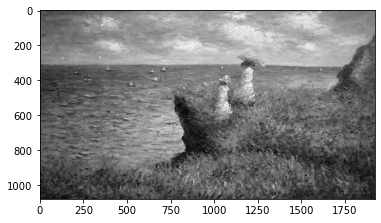

In [27]:
#膨張収縮処理
element4 = np.array([[0, 1, 0], [1, 1, 1],[0, 1, 0]], np.uint8) #4近傍
element8 = np.array([[1, 1, 1], [1, 1, 1],[1, 1, 1]], np.uint8) #8近傍
#img_dst = cv2.erode(img, element4, iterations = 1)
img_dst = cv2.erode(img, element8, iterations = 1)
plt.imshow(img_dst, cmap='gray')

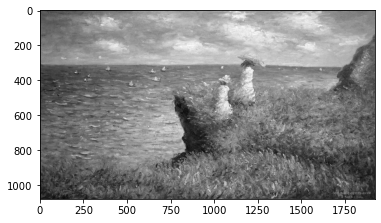

In [30]:
#OP,CLOSE, 処理
img_tmp = cv2.morphologyEx(img, cv2.MORPH_OPEN, element8)
plt.imshow(img_tmp, cmap='gray')

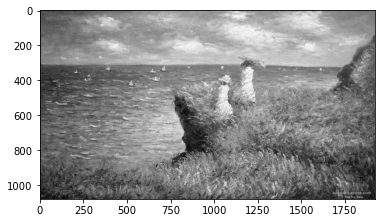

In [32]:
img_dst = cv2.morphologyEx(img, cv2.MORPH_CLOSE, element8)
plt.imshow(img_dst, cmap='gray')

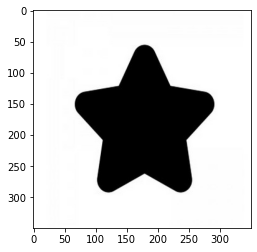

In [3]:
img = cv2.imread('./star.jpg')
plt.imshow(img)

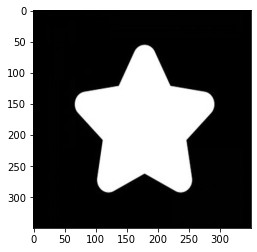

In [5]:
#ネガポジ変換
img = 255 - img
plt.imshow(img)

In [ ]:
x, y, w, h = cv2.boundingRect(img)
aspectratio = float(h) / w
print(aspectratio)
img_rect = cv2.rectangle(img, (x, y), (x+w, y+h), 128)
plt.imshow(img_rect, cmap='gray')

In [ ]:
#重心
m = cv2.moments(img)
area = m['m00']
x_g = m['m10'] / m['m00']
y_g = m['m01'] / m[',00']
ang = 0.5 * math.atan2(2.0 * m['mull'], m['mu20'] - m['mu02'])

In [ ]:
#アルファブレンディング
img_1 = cv2.imread('./2411.jpg')
img_2 = cv2.imread('./4169.jpg')

img_dst = cv2.addWeighted(img_1, 0.5, img_2, 0.5, 0.0)
plt.imshow(img_dst)

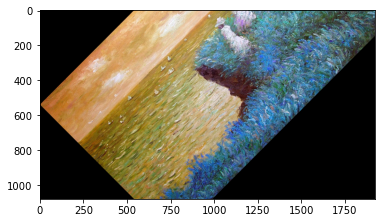

In [5]:
#アフィン変換
size = tuple(np.array([img.shape[1], img.shape[0]]))

afn_mat = np.float32([[math.cos(-math.pi / 4.0), -math.sin(-math.pi/4.0), 0],
                      [math.sin(-math.pi / 4.0), math.cos(-math.pi / 4.0), img.shape[0] * 0.5]])

img_dst = cv2.warpAffine(img, afn_mat, size, flags=cv2.INTER_CUBIC)
plt.imshow(img_dst)

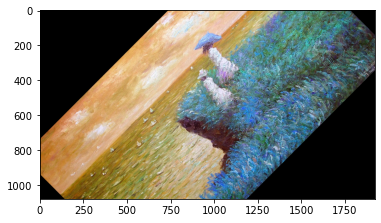

In [7]:
#中心回転
angle = 45.0
scale = 1.0
center = tuple(np.array([img.shape[1] * 0.5, img.shape[0] * 0.5]))
size = tuple(np.array([img.shape[1], img.shape[0]]))
rot_mat = cv2.getRotationMatrix2D(center, angle, scale)

img_dst = cv2.warpAffine(img, rot_mat, size, flags = cv2.INTER_CUBIC)
plt.imshow(img_dst)

In [8]:
img.shape

(1080, 1920, 3)

In [10]:
#射影変換
size = tuple(np.array([img.shape[1], img.shape[0]]))

pts1 = np.float32([[160, 479], [480, 479], [480, 240], [160, 240]])
pts2 = np.float32([[160, 479], [480, 479], [400, 240], [240, 240]])

psp_mat = cv2.getPerspectiveTransform(pts1, pts2)

img_dst = cv2.warpPerspective(img, psp_mat, size, flags = cv2.INTER_LINEAR)


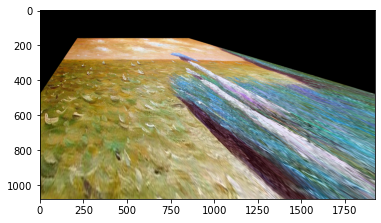

In [11]:
plt.imshow(img_dst)

In [ ]:
#距離画像のカラー画像表示
rows, cols = img.shape[:2]
img_max = 255 * np.ones([rows, cols]).astype('uint8')

img_h = img
img_s = img_max
img_v = img

img_hsv = cv2.merge((img_h, img_s, img_s))
img_dst = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR)
plt.imshow(img_dst)

In [ ]:
#セグメンテーション
depth_min = 19;
depth_max = 110;

img_dst = cv2.inRange(img, depth_min, depth_max)
plt.imshow(img_dst)

In [ ]:
#等高線抽出
rows, cols = img.shape[:2]
img_max = np.zeros([rows, cols]).astype('uint8')

for i in range(1, 256, 5):
    print(i)
    img_tmp = cv2.compare(img, i, cv2.CMP_EQ)
    img_dst = cv2.bitwise_or(img_tmp, img_dst)
    
plt.imshow(img_dst)